In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [4]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228326 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 18.7+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228326 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 18.7+ MB


In [8]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [9]:
cati=[]
conti=[]


In [10]:
for i in df:
    if df[i].dtypes=="object":
        
        cati.append(i)
    elif df[i].dtypes=="float64":
        conti.append(i)
    

In [11]:
cati

['Province/State', 'Country/Region', 'Last Update']

In [12]:
conti

['Confirmed', 'Deaths', 'Recovered']

In [13]:
for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

In [14]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


In [17]:
dftime= df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
dftime

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

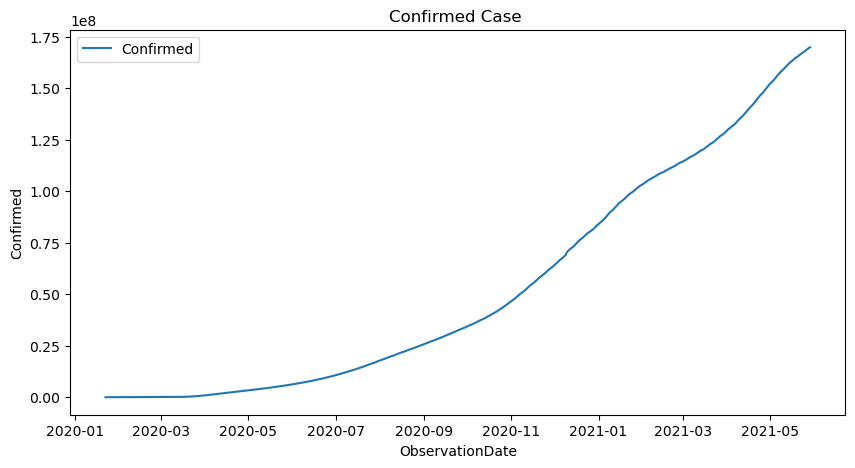

In [20]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dftime, x='ObservationDate', y='Confirmed', label='Confirmed').set(title='Confirmed Case ')
plt.show()
#plt.title('Confirmed Case')


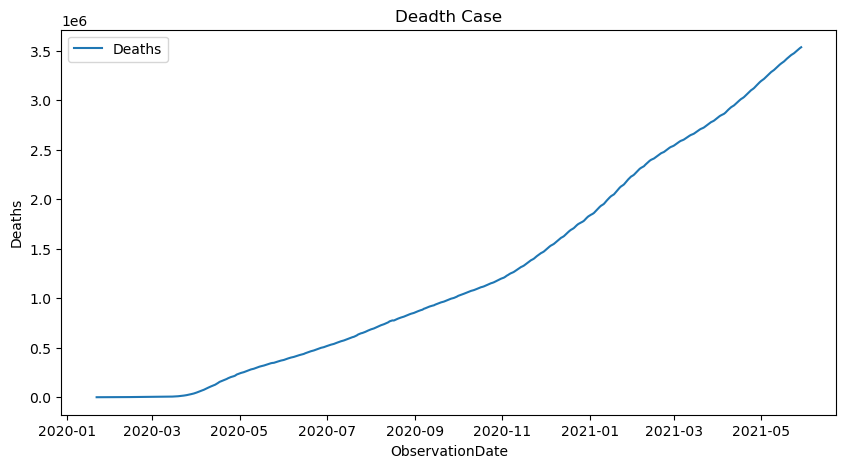

In [21]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dftime, x='ObservationDate', y='Deaths', label='Deaths').set(title='Deadth Case')
plt.show()

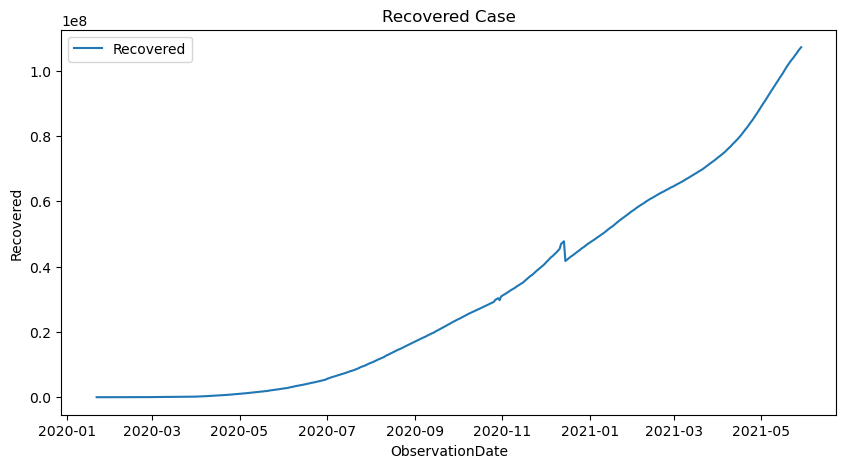

In [22]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dftime, x='ObservationDate', y='Recovered', label='Recovered').set(title='Recovered Case')
plt.show()

In [23]:
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

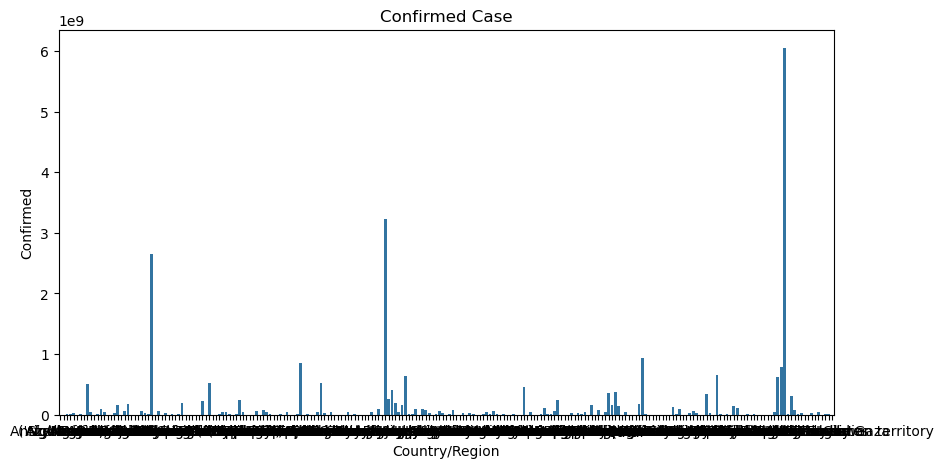

In [24]:
fig = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country).set(title='Confirmed Case')
plt.show()

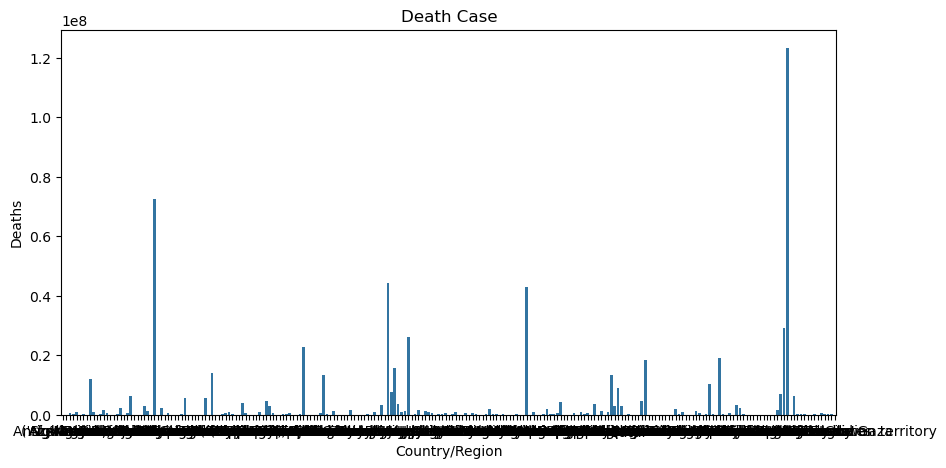

In [25]:
fig = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_country.index, y='Deaths', data=df_country).set(title='Death Case')
plt.show()

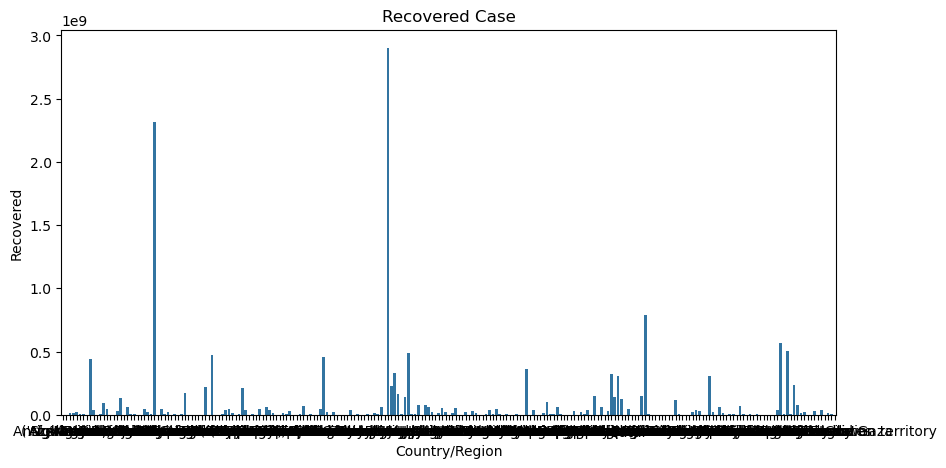

In [26]:
fig = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_country.index, y='Recovered', data=df_country).set(title='Recovered Case')
plt.show()

In [27]:
 #Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map

In [29]:
#matrix=df.corr().index()

In [31]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
total=df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
total

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [ ]:
 #Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.

In [33]:
max_confirmed = total.loc[total['Confirmed'].idxmax()]
print("Country/Region with the highest confirmed cases:")
print(max_confirmed)


Country/Region with the highest confirmed cases:
Confirmed    6.049146e+09
Deaths       1.233038e+08
Recovered    5.033710e+08
Name: US, dtype: float64


In [35]:
df.max()

SNo                                        306429
ObservationDate               2021-05-29 00:00:00
Province/State                       Zuid-Holland
Country/Region     occupied Palestinian territory
Last Update                           4/6/20 9:37
Confirmed                               5863138.0
Deaths                                   112385.0
Recovered                               6399531.0
dtype: object

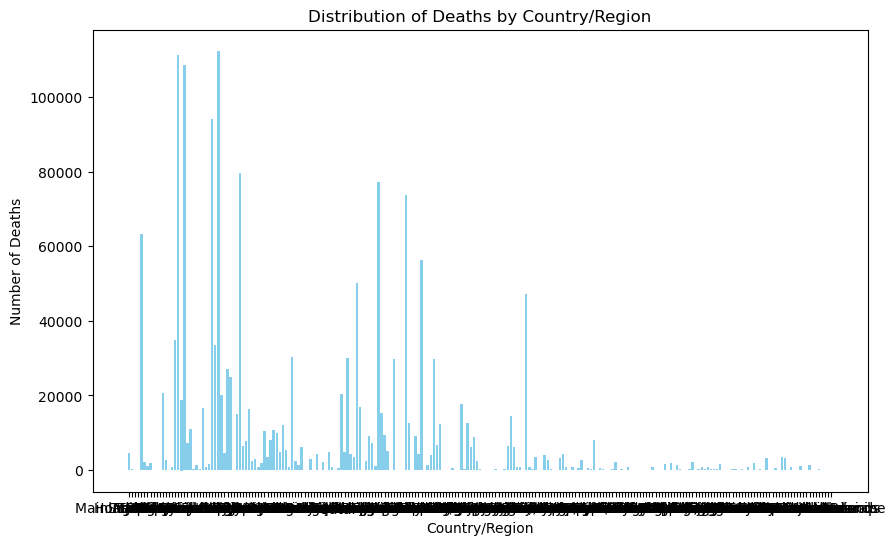

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(df['Country/Region'], df['Deaths'], color='skyblue')
plt.title('Distribution of Deaths by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Number of Deaths')
plt.show()
